In [137]:
import numpy as np
import matplotlib.pylab as plt


from scipy import interpolate

from matplotlib import ticker, cm
import matplotlib as mpl
import sys
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from scipy.interpolate import make_interp_spline, BSpline
from scipy.signal import savgol_filter


In [38]:
!ls no_treatment/
!mv no_treatment/s20_simp_SFHo_Gang8.dat .


s20_ref_Gang_SFHo.dat	   s20_ref_Hann_SRO.log     s20_simp_SFHo_Gang.dat
s20_ref_Gang_SFHo_per.dat  s20_ref_SFHo_nb7.dat     s20_simp_SFHo_Hann_nr.dat
s20_ref_Gang_SFHo_per.log  s20_simp_SFHo3.dat
s20_ref_Hann_SRO.dat	   s20_simp_SFHo_Gang8.dat


In [16]:
!ls *1D.dat | grep -v "SFHo"

FLASH_Gang_ref_1D.dat
FLASH_Gang_simp_1D.dat
FLASH_Hann_ref_1D.dat
FLASH_Hann_simp_1D.dat


In [3]:
list_file = !ls *1D.dat | grep -v "SFHo"
!head -1 s20_ref_SFHo_nb7.dat

  #1 time                   2 mass                    3 x-momentum              4 y-momentum              5 z-momentum              6 E_total                 7 E_kinetic               8 E_internal              9 E_grav                  10 explosion energy       11 E_bind,gain            12 mean shock radius      13 min shock radius       14 mass accretion rate    15 max shock radius       16 magnetic energy        17 central density        18 net heating rate, gain 19 mass in gain region    20 avg entropy in gain    21 neutron star mass      22 pns rotation period    23 pns-x                  24 pns-y                  25 pns-z                  26 com-x                  27 com-y                  28 com-z                  29 average radius of PNS  30 correct PNS radius     31 E_kinetic, theta, gain 32 E_kinetic, phi, gain   33 max(c_s^/v_esc^2)      34 M1 lum tot nue         35 M1 lum tot anue        36 M1 lum tot nux         37 M1 aveE nue            38 M1 aveE anue           39 M1 aveE

In [173]:
list_file = !ls s20*SFHo*.dat

print(list_file)

['s20_ref_Gang_SFHo8.dat', 's20_ref_Gang_SFHo_hr8.dat', 's20_ref_Gang_SFHo_new8.dat', 's20_ref_Gang_SFHo_per.dat', 's20_ref_Hann_SFHo8.dat', 's20_ref_Hann_SFHo_hr8.dat', 's20_ref_SFHo_nb78.dat', 's20_simp_SFHo37.dat', 's20_simp_SFHo_Gang7.dat', 's20_simp_SFHo_Gang88.dat', 's20_simp_SFHo_Gang_nr8.dat', 's20_simp_SFHo_Hann88.dat']


In [144]:
for i in list_file:
    globals()[i+"dens"] = np.loadtxt(i,unpack=True,usecols=(18))
    

In [156]:
list_file = !ls s20*.dat | grep -v "SFHo" # && ls s20*SRO*.dat #&& ls no_treatment/*.dat
# list_file=['s20_ref_Gang_SFHo_new.dat', 's20_ref_Hann_SFHo.dat', 's20_simp_SFHo_Gang8.dat', 's20_simp_SFHo_Gang_nr.dat', 's20_simp_SFHo_Hann8.dat']
list_file.remove('s20WH07_ref.dat')

print(list_file)

['s20_0.75.dat', 's20_ref_Gang_SRO.dat', 's20_ref_SRO3.dat', 's20_simp_SRO3.dat', 's20_simp_SRO_Gang8.dat', 's20_simp_SRO_Gang.dat', 's20_simp_SRO_Gang_old.dat']


In [8]:
for i in list_file:
    
    globals()[i+"_GW"] = np.loadtxt(i,unpack=True,usecols=(0,45,47,48,49))

In [193]:
for i in list_file:
    globals()[i[:]] = np.loadtxt(i,unpack=True,usecols=(0,11,16,17,29,33,34,35,36,37,38,18,13,10,17,9,30,31))
    globals()['gain'+i[:]]=np.loadtxt(i,unpack=True,usecols=(0,10,17,18,19,30,31,42,43,44))
# 11 E_bind,gain  
# 18 net heating rate, gain 
# 19 mass in gain region   
# 20 avg entropy in gain 
# 31 E_kinetic, theta, gain 
# 32 E_kinetic, phi, gain


In [141]:
for i in list_file:
    Y=globals()[i[0]]
    X=globals()[i[1]]
    plt.plot([x for _, x in sorted(zip(Y, X))],label=i)
    plt.legend()

KeyError: 's'

In [149]:
for i in list_file:
    print(i)
    if '8.dat' in i :
        globals()['alpha'+i]=0.7
    elif '7.dat' in i :
        globals()['alpha'+i]=0.3
    else: 
        globals()['alpha'+i]=1.
    if 'ref' in i: 
        globals()['ticks'+i]='-'
    else:
        globals()['ticks'+i]='--'
        

    if ('Gang' in i) & ('SFHo' in i) : 
        globals()['color'+i]='orange'
        globals()['tb'+i]=0.300
    elif 'nr' in i :
        globals()['color'+i]='m'
    elif 'SFHo' in i :
        globals()['color'+i]='r'
        globals()['tb'+i]=0.300
    elif ('Gang' in i) & ('SRO' in i) : 
        globals()['color'+i]='g'
        globals()['tb'+i]= 0.319
    elif 'SRO' in i :
        globals()['color'+i]='b'
        globals()['tb'+i]= 0.319
      
    else:
        globals()['color'+i]='k'
        globals()['tb'+i]= 0.319
        print("case not found")
        

s20_0.75.dat
case not found
s20_ref_Gang_SRO.dat
s20_ref_SRO3.dat
s20_simp_SRO3.dat
s20_simp_SRO_Gang8.dat
s20_simp_SRO_Gang.dat
s20_simp_SRO_Gang_old.dat
s20WH07_ref.dat
case not found


In [23]:
print(globals()['ticks'+'s20_ref_Gang_SFHo_new'])

-


In [191]:
def plot_interp(x,y):
#     time=x
#     tau_new=savgol_filter(y,20,3)
    f = interpolate.interp1d(x, y,kind='nearest-up')
    time=np.linspace(x.min(),x.max(),200)
    tau_new= f(time)
    return time, tau_new

s20_0.75.dat
s20_ref_Gang_SRO.dat
s20_ref_SRO3.dat
s20_simp_SRO3.dat
s20_simp_SRO_Gang8.dat
s20_simp_SRO_Gang.dat
s20_simp_SRO_Gang_old.dat


[Text(1, -0.06, ''),
 Text(1, -0.039999999999999994, ''),
 Text(1, -0.019999999999999997, ''),
 Text(1, 0.0, ''),
 Text(1, 0.020000000000000004, ''),
 Text(1, 0.04000000000000001, ''),
 Text(1, 0.06, '')]

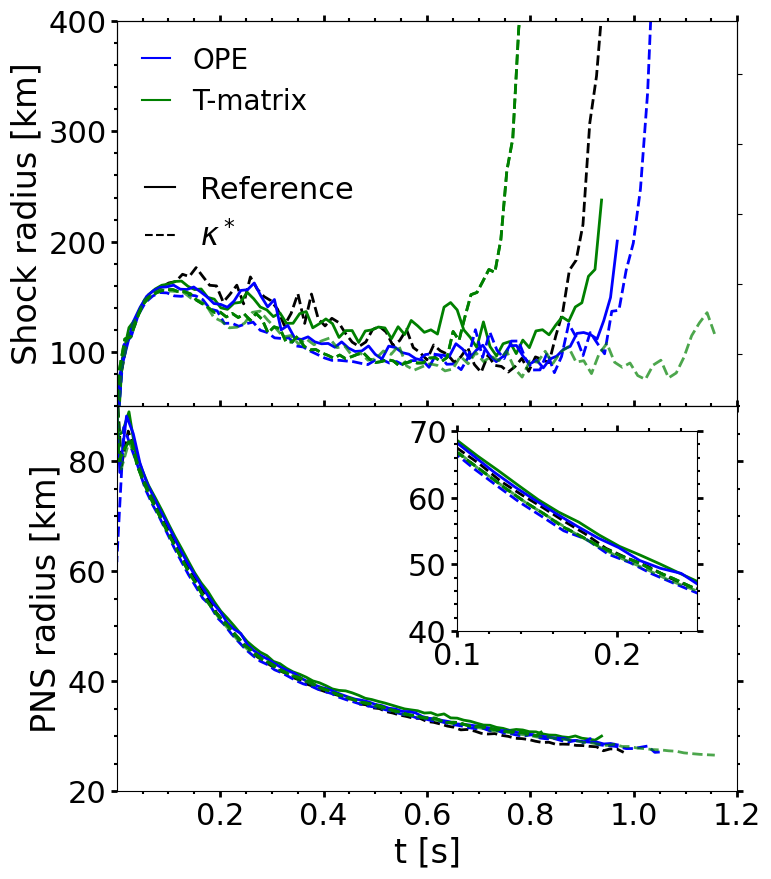

In [172]:
tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

factor=1e-5

fig,ax = plt.subplots(2,1,figsize=(8,10))
ax1=ax[0]
ax2=ax[1]


l, b, h, w = .55, .27, 0.2, .3
ax3= fig.add_axes([l, b, w, h])


#ax1.plot(s20_simp_SRO_Gang[0]-tbounce_SRO,s20_simp_SRO_Gang[1]*1e-5,'--',color=col[3])
#ax1.plot(s20_ref_Gang_SRO[0]-tbounce_SRO,s20_ref_Gang_SRO[1]*1e-5,color=col[3])
#ax1.plot(s20_ref_SRO3[0]-tbounce_SRO,s20_ref_SRO3[1]*1e-5,color=col[2])
#ax1.plot(s20_simp_SRO3[0]-tbounce_SRO,s20_simp_SRO3[1]*1e-5,'--',color=col[2])
for i in list_file:
    print(i)
    tau=globals()[i][1]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i],lw=2)
    
    tau=globals()[i][4]
    time,tau_new=plot_interp(x,tau)
    ax2.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i],lw=2)
    ax3.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i],lw=2)
    
    


# ax4 = ax1.twinx()
# black_line1, = plt.plot([], [], color='r', linestyle='-')
# black_line2, = plt.plot([], [], color='orange', linestyle='-')
# leg=ax4.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=20,handlelength=1,title='SFHo',title_fontsize=22,frameon=False,loc= "upper left")

# plt.gca().add_artist(leg)







# ax1.set_xlim([0.,0.6])
# ax2.set_xlim([0.001,0.6])

ax1.set_xlim([0.001,1.2])
ax4.set_xlim([0.001,1.2])
ax2.set_xlim([0.001,1.2])
ax1.set_ylim([51,400])
# ax4.set_ylim([51,1000])
ax2.set_ylim([20,90])




for i in range(3) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=22,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=22,width=1.5,length=2)


ax3.set_xlim([0.1,0.25])
ax3.set_ylim([40,70])
# ax1.set_yscale('log')

ax2.set_xlabel(r't [s]',fontsize=24)
ax1.set_xlabel(r't [s]',fontsize=24)
ax1.set_ylabel(r'Shock radius [km]',fontsize=24)
ax2.set_ylabel(r'PNS radius [km]',fontsize=24)#,rotation=90,labelpad=40



# ax2.yaxis.set_label_position("right")
# ax2.yaxis.set_ticks_position("right")
plt.subplots_adjust(wspace=0,hspace=0.)
ax1.set_xticklabels([])    


black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax1.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=22,handlelength=1,frameon=False,loc= "center left")

ax4=ax1.twinx()

black_line1, = plt.plot([], [], color='b', linestyle='-')
black_line2, = plt.plot([], [], color='g', linestyle='-')
ax4.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=20,handlelength=1,title_fontsize=22,frameon=False,loc= "upper left") #,title='SFHo'



ax4.set_yticklabels([])    

s20_0.75.dat
s20_ref_Gang_SRO.dat
s20_ref_SRO3.dat
s20_simp_SRO3.dat
s20_simp_SRO_Gang8.dat
s20_simp_SRO_Gang.dat
s20_simp_SRO_Gang_old.dat


[Text(1, -0.06, ''),
 Text(1, -0.039999999999999994, ''),
 Text(1, -0.019999999999999997, ''),
 Text(1, 0.0, ''),
 Text(1, 0.020000000000000004, ''),
 Text(1, 0.04000000000000001, ''),
 Text(1, 0.06, '')]

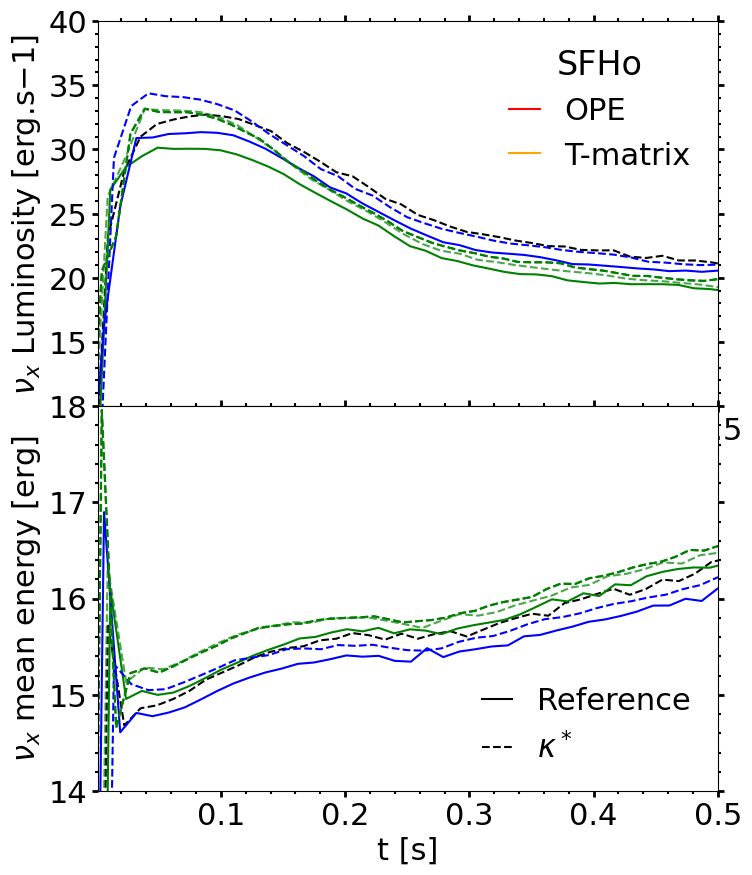

In [158]:
tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

factor=1.

fig,ax = plt.subplots(2,1,figsize=(8,10))
ax1=ax[0]
ax2=ax[1]
# print(s20_ref_SFHo_nb7)
for i in list_file:
    print(i)
    # tau=globals()[i][5]
    # x=globals()[i][0]
    # time,tau_new=plot_interp(x,tau)
    # ax1.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
    #          ,alpha=globals()['alpha'+i])
    # tau=globals()[i][8]
    # time,tau_new=plot_interp(x,tau)
    # ax2.plot(time-globals()['tb'+i],tau_new,color=globals()['color'+i],ls=globals()['ticks'+i]\
    #          ,alpha=globals()['alpha'+i])
    # tau=globals()[i][6]
    # x=globals()[i][0]
    # time,tau_new=plot_interp(x,tau)
    # ax1.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
    #          ,alpha=globals()['alpha'+i])
    # tau=globals()[i][9]
    # time,tau_new=plot_interp(x,tau)
    # ax2.plot(time-globals()['tb'+i],tau_new,color=globals()['color'+i],ls=globals()['ticks'+i]\
    #          ,alpha=globals()['alpha'+i])

    tau=globals()[i][7]/4
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i])
    tau=globals()[i][10]
    time,tau_new=plot_interp(x,tau)
    ax2.plot(time-globals()['tb'+i],tau_new,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i])



black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,title='SFHo',title_fontsize=24,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=22,handlelength=1,frameon=False,loc= "lower right")



ax1.set_xlim([0.001,0.5])
ax1.set_ylim([10.01,40])
ax2.set_xlim([0.001,0.5])
ax2.set_ylim([14,18])




for i in range(2) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=22,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=22,width=1.5,length=2)


ax2.set_xlabel(r't [s]',fontsize=22)
# ax1.set_xlabel(r't [s]',fontsize=24)
ax1.set_ylabel(r'$\nu_x$ Luminosity [erg.s${-1}$]',fontsize=22)
ax2.set_ylabel(r'$\nu_x$ mean energy [erg]',fontsize=22)#,rotation=-90,labelpad=40)

# ax2.yaxis.set_label_position("right")
# ax2.yaxis.set_ticks_position("right")
plt.subplots_adjust(wspace=0,hspace=0.)
# ax1.set_xticklabels([])    
ax4.set_yticklabels([])    

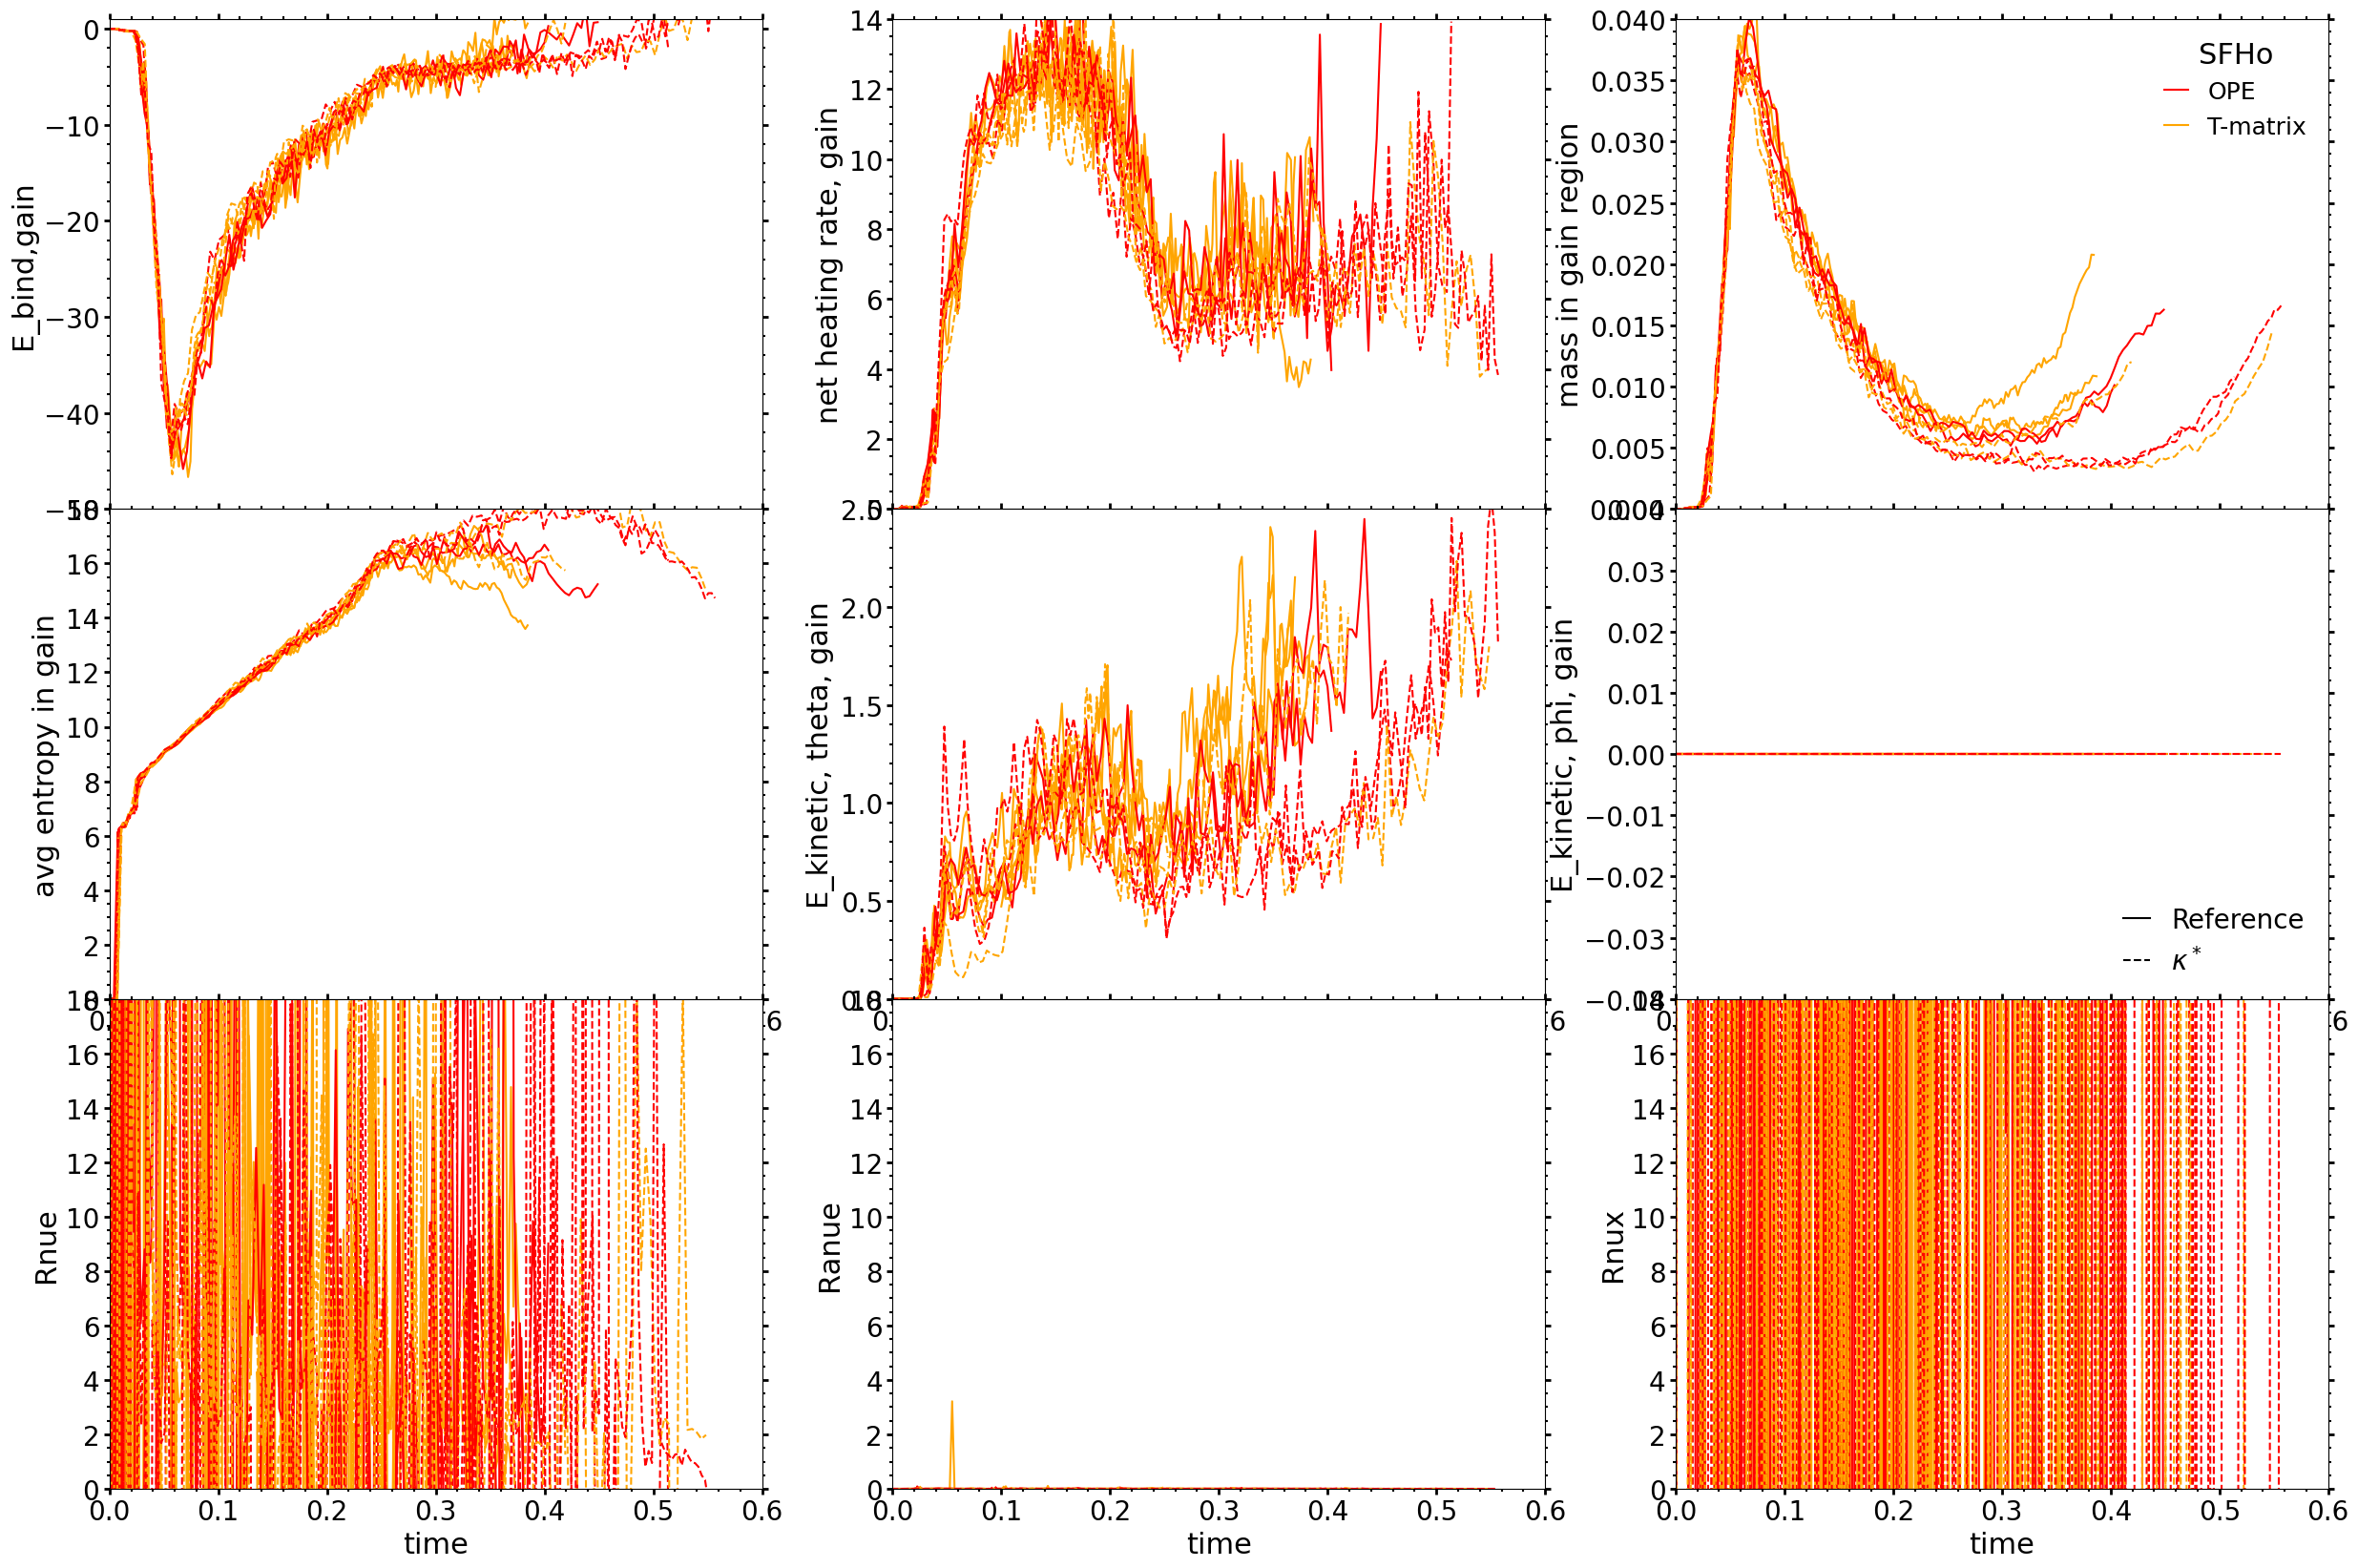

In [220]:
# tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

factor=1

fig,ax = plt.subplots(3,3,figsize=(30,20))
ax1=ax[0,0]
ax2=ax[0,1]
ax3=ax[0,2]
ax4=ax[1,0]
ax5=ax[1,1]
ax6=ax[1,2]
ax7=ax[2,0]
ax8=ax[2,1]
ax9=ax[2,2]


names=['time','E_bind,gain','net heating rate, gain','mass in gain region','avg entropy in gain','E_kinetic, theta, gain',\
       'E_kinetic, phi, gain','Rnue','Ranue','Rnux'] #
factors=[1,1e-49,1e-51,(2e33)**-1,1,1e-49,1.,1.,1.,1.]
# 11 E_bind,gain  
# 18 net heating rate, gain 
# 19 mass in gain region   
# 20 avg entropy in gain 43 R_nue                  44 R_anue                 45 R_nux 
# 31 E_kinetic, theta, gain 
# 32 E_kinetic, phi, gain
lims=[[-50,1],[0,14],[0,4e-2],[0,18],[0,2.5],[-0.04,0.04],[0,18],[0,18],[0,18]]
for i in list_file:
    for j in range(9):
        test=globals()['ax'+str(j+1)]
        tau=(globals()['gain'+i][1+j]*factors[1+j])
        x=globals()['gain'+i][0]
        time,tau_new=plot_interp(x,tau)
        test.plot(time-globals()['tb'+i],tau_new,color=globals()['color'+i],ls=globals()['ticks'+i])
        # test.plot(x-globals()['tb'+i],tau,color=globals()['color'+i],ls=globals()['ticks'+i])
        test.set_ylim(lims[j])
        test.set_ylabel(names[1+j],fontsize=22)
        if j>2:
            test.set_xlabel(names[0],fontsize=22)
        else:
            test.set_xticklabels([]) 

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax3.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title='SFHo',title_fontsize=22,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax6.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "lower right")



# ax1.set_xlim([0,0.6])
#ax1.set_ylim([10,40])
# ax2.set_xlim([0,0.6])
# ax2.set_ylim([14,18])

# test=globals()['ax'+str(i)]
# ax7.set_yscale('log')
# ax8.set_yscale('log')
# ax9.set_yscale('log')

for i in range(9) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)
    test.set_xlim([0,0.6])

# ax1.set_xlabel(r't [s]',fontsize=22)
# ax1.set_ylabel(r'Explosion energy',fontsize=22)

# ax1.set_yscale('log')
plt.subplots_adjust(hspace=0.)
# ax1.set_xticklabels([])    
names=['time','E_bind,gain','net heating rate, gain','mass in gain region','avg entropy in gain','E_kinetic, theta, gain',\
       'E_kinetic, phi, gain','Rnue','Ranue','Rnux']


/tmp/ipykernel_210039/1606755986.py:27: RuntimeWarning: invalid value encountered in divide
  tau=(globals()[i][11]/globals()[i][12])/(abs(globals()[i][13])/globals()[i][14])


[Text(0.0, 0, ''),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, ''),
 Text(1.25, 0, ''),
 Text(1.5, 0, '')]

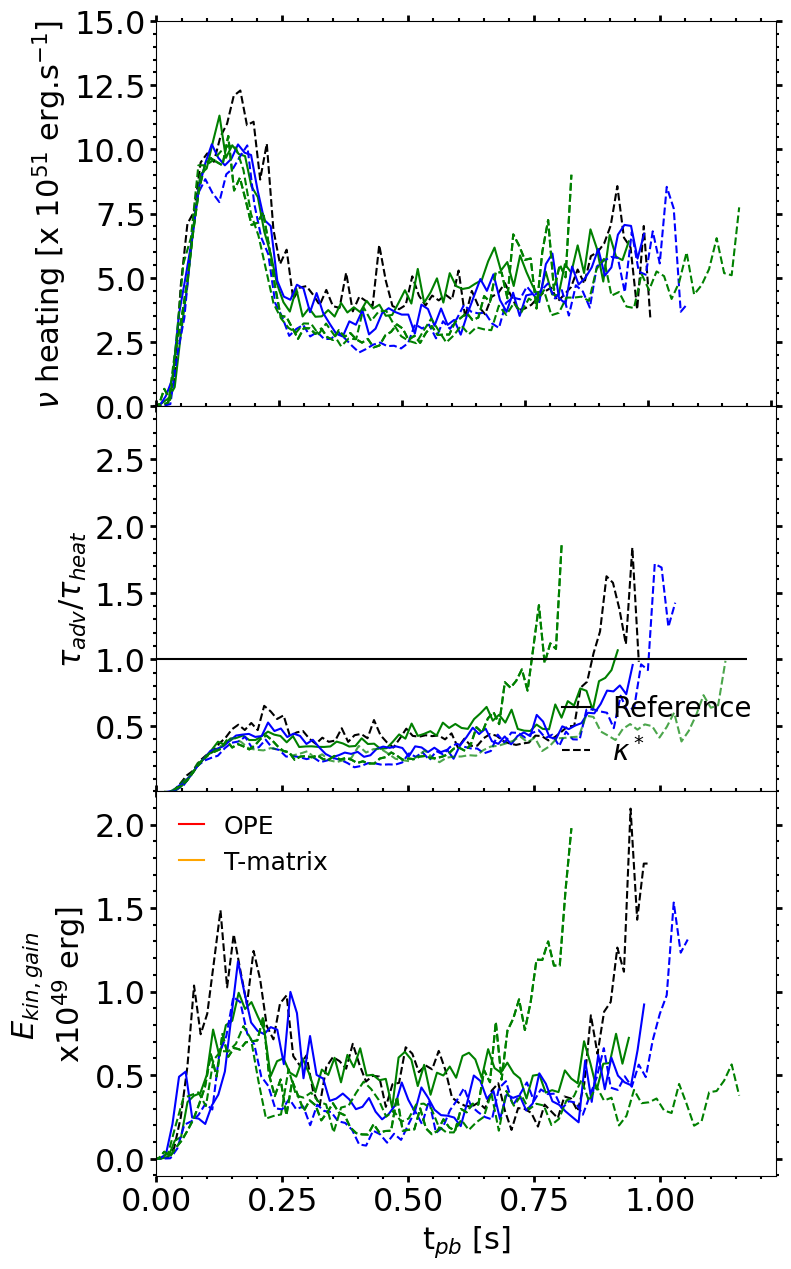

In [162]:
tbounce_SFHo=0.299
tbounce_SRO=0.317
# from scipy.signal import savgol_filter

col=['r','orange','b','g']

factor=1#e-51

fig,ax = plt.subplots(3,1,figsize=(8,15))
ax1=ax[0]
ax2=ax[1]
ax3=ax[2]



for i in list_file:
    try:
        globals()['tb'+i]
    except KeyError:
        continue
    tau=globals()[i][14]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i],tau_new*1e-51,color=globals()['color'+i],ls=globals()['ticks'+i])


    tau=(globals()[i][11]/globals()[i][12])/(abs(globals()[i][13])/globals()[i][14])
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax2.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i])
    
    tau=globals()[i][16]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax3.plot(time-globals()['tb'+i],tau_new*1e-49,color=globals()['color'+i],ls=globals()['ticks'+i])


black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax3.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title_fontsize=22,frameon=False,loc= "upper left")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "lower right")

ax2.hlines(1.,xmin=0.,xmax=1.2,color='k')



ax1.set_ylim([0,15])
# ax1.set_xlim([0,0.6])
# ax2.set_xlim([0,0.6])
# ax3.set_xlim([0,0.6])

ax1.set_xlim(left=0.)
ax2.set_xlim(left=0.)
ax3.set_xlim(left=0.)

ax2.set_ylim([0.01,2.9])




for i in range(3) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=23,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=23,width=1.5,length=2)


ax[-1].set_xlabel(r't$_{pb}$ [s]',fontsize=22)
ax1.set_ylabel(r'$\nu$ heating [x 10$^{51}$ erg.s$^{-1}$]',fontsize=22)
ax2.set_ylabel(r'$\tau_{adv}/\tau_{heat}$',fontsize=22)
ax3.set_ylabel(r'$E_{kin,gain}$ '+ '\n' 'x10$^{49}$ erg]',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0.)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    


[Text(0.0, 0, ''),
 Text(0.1, 0, ''),
 Text(0.2, 0, ''),
 Text(0.30000000000000004, 0, ''),
 Text(0.4, 0, ''),
 Text(0.5, 0, ''),
 Text(0.6000000000000001, 0, '')]

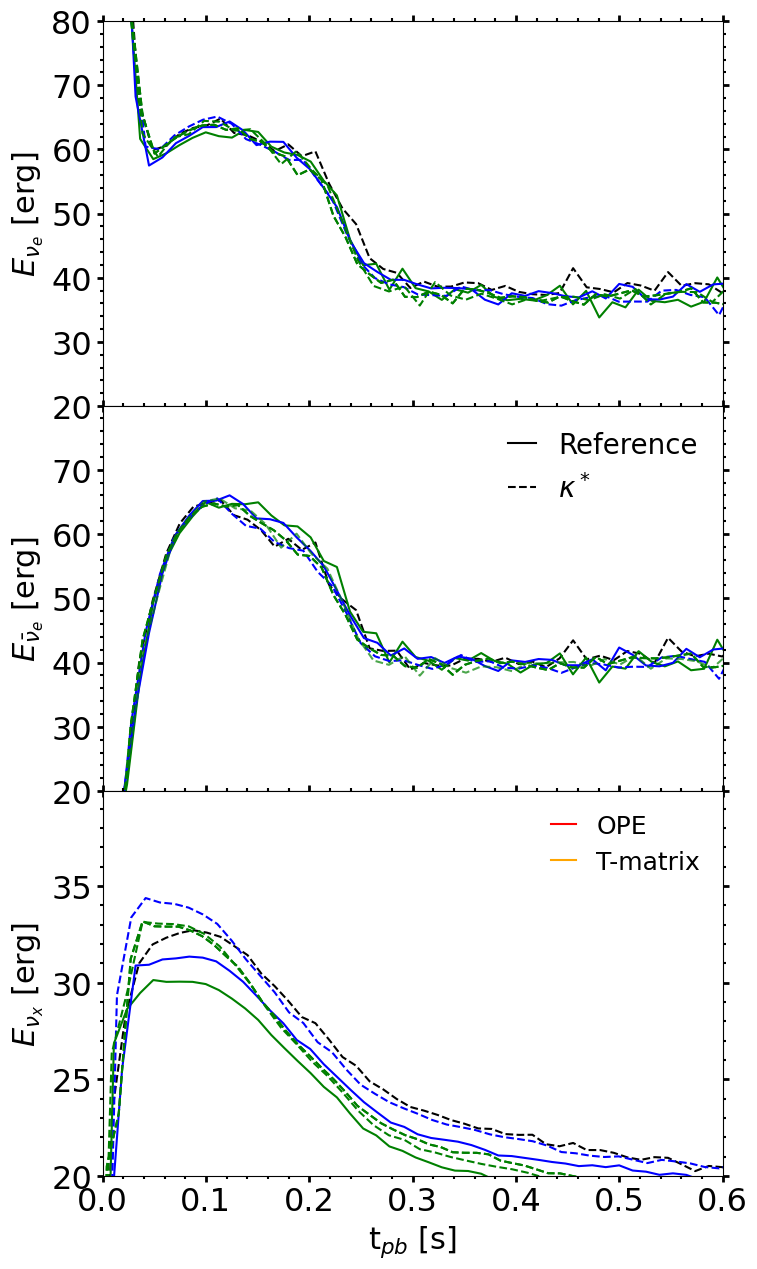

In [163]:
tbounce_SFHo=0.299
tbounce_SRO=0.317
# from scipy.signal import savgol_filter

col=['r','orange','b','g']

factor=1#e-51

fig,ax = plt.subplots(3,1,figsize=(8,15))
ax1=ax[0]
ax2=ax[1]
ax3=ax[2]



for i in list_file:
    try:
        globals()['tb'+i]
    except KeyError:
        continue
    tau=globals()[i][5]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i],tau_new,color=globals()['color'+i],ls=globals()['ticks'+i])


    tau=globals()[i][6]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax2.plot(time-globals()['tb'+i],tau_new*factor,color=globals()['color'+i],ls=globals()['ticks'+i]\
             ,alpha=globals()['alpha'+i])
    
    tau=globals()[i][7]
    x=globals()[i][0]
    time,tau_new=plot_interp(x,tau)
    ax3.plot(time-globals()['tb'+i],tau_new/4,color=globals()['color'+i],ls=globals()['ticks'+i])


black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax3.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title_fontsize=22,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "upper right")

ax2.hlines(1.,xmin=0.,xmax=1.2,color='k')



ax1.set_ylim([20,80])
ax2.set_ylim([20,79.9])
ax3.set_ylim([20,39.9])

ax1.set_xlim([0,0.6])
ax2.set_xlim([0,0.6])
ax3.set_xlim([0,0.6])

# ax1.set_xlim(left=0.)
# ax2.set_xlim(left=0.)
# ax3.set_xlim(left=0.)





for i in range(3) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=23,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=23,width=1.5,length=2)


ax[-1].set_xlabel(r't$_{pb}$ [s]',fontsize=22)
ax1.set_ylabel(r'$E_{\nu_e}$ [erg]',fontsize=22)
ax2.set_ylabel(r'$E_{\bar{\nu}_e}$ [erg]',fontsize=22)
ax3.set_ylabel(r'$E_{\nu_x}$ [erg]',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0.)
ax1.set_xticklabels([])    
ax2.set_xticklabels([])    


In [165]:
# tbounce_SFHo=0.299
tbounce_SRO=0.317
# from scipy.signal import savgol_filter

col=['r','orange','b','g']

factor=1#e-51

fig,ax = plt.subplots(2,1,figsize=(8,10))
ax1=ax[0]
ax2=ax[1]
# ax3=ax[2]



for i in list_file:
    tau=globals()[i[16]
    x=globals()[i[0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i,tau_new,color=globals()['color'+i,ls=globals()['ticks'+i)


    tau=globals()[i[17]
    x=globals()[i[0]
    time,tau_new=plot_interp(x,tau)
    ax2.plot(time-globals()['tb'+i,tau_new*factor,color=globals()['color'+i,ls=globals()['ticks'+i\
             ,alpha=globals()['alpha'+i)
    
#     tau=globals()[i[16]
#     x=globals()[i[0]
#     time,tau_new=plot_interp(x,tau)
#     ax3.plot(time-globals()['tb'+i,tau_new*factor,color=globals()['color'+i,ls=globals()['ticks'+i)


black_line1, = plt.plot([], [], color='b', linestyle='-')
black_line2, = plt.plot([], [], color='g', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title='SRO',title_fontsize=22,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "upper left")

# ax2.hlines(1.,xmin=0.,xmax=1.2,color='k')


ax1.set_xlim([0,1.2])
# ax1.set_ylim([0,15])
ax2.set_xlim([0,1.2])
# ax3.set_xlim([0,0.6])
# ax2.set_ylim([0,1.9])




for i in range(2) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)


ax2.set_xlabel(r't$_{pb}$ [s]',fontsize=22)
ax1.set_ylabel(r'$\nu$ heating',fontsize=22)
ax2.set_ylabel(r'$\tau_{heat/adv}$',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0.)
ax1.set_xticklabels([])    
# ax2.set_xticklabels([])    


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1777753516.py, line 20)

[Text(0.0, 0, ''),
 Text(0.2, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, '')]

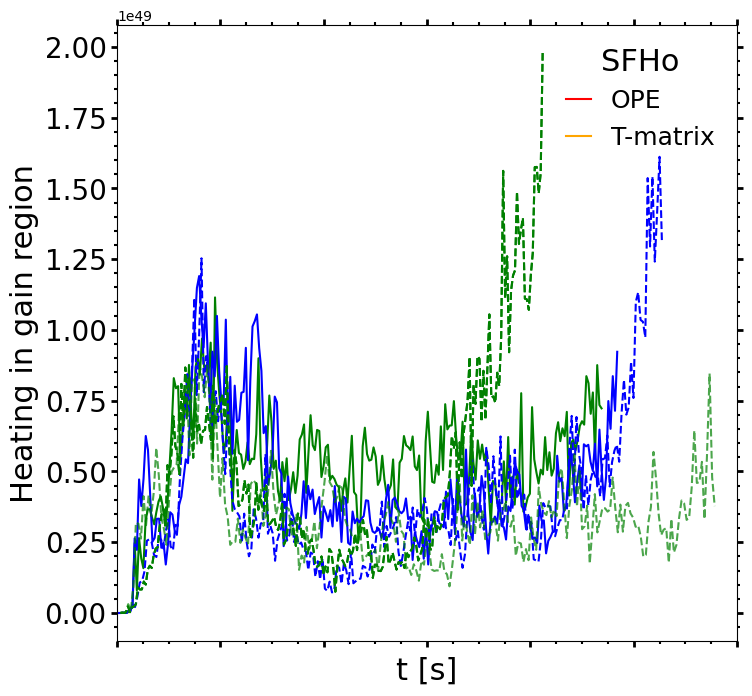

In [27]:
# tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

factor=1

fig,ax = plt.subplots(1,1,figsize=(8,8))
ax1=ax

for i in list_file:
    tau=globals()[i[-2]
    x=globals()[i[0]
    time,tau_new=plot_interp(x,tau)
    timetest=np.linspace(time[0],time[-1],100)
    pinterp=np.interp(timetest,time,tau_new)
    
    spl = make_interp_spline(time, tau_new, k=1)  # type: BSpline
    power_smooth = spl(time)

#     ax1.plot(time-globals()['tb'+i,tau_new*factor,color=globals()['color'+i,ls=globals()['ticks'+i\
#              ,alpha=globals()['alpha'+i)    
    ax1.plot(time-globals()['tb'+i,power_smooth*factor,color=globals()['color'+i,ls=globals()['ticks'+i\
             ,alpha=globals()['alpha'+i)
    
black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title='SFHo',title_fontsize=22,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "lower right")



ax1.set_xlim([0,1.2])
#ax1.set_ylim([10,40])
ax2.set_xlim([0,1.2])
ax2.set_ylim([14,18])




for i in range(2) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)


ax1.set_xlabel(r't [s]',fontsize=22)
ax1.set_ylabel(r'Heating in gain region',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0.)
ax1.set_xticklabels([])    


/tmp/ipykernel_286609/2677232092.py:11: RuntimeWarning: invalid value encountered in divide
  tau=globals()[i[:-4]][11]/globals()[i[:-4]][12]/(abs(globals()[i[:-4]][13])/globals()[i[:-4]][14])


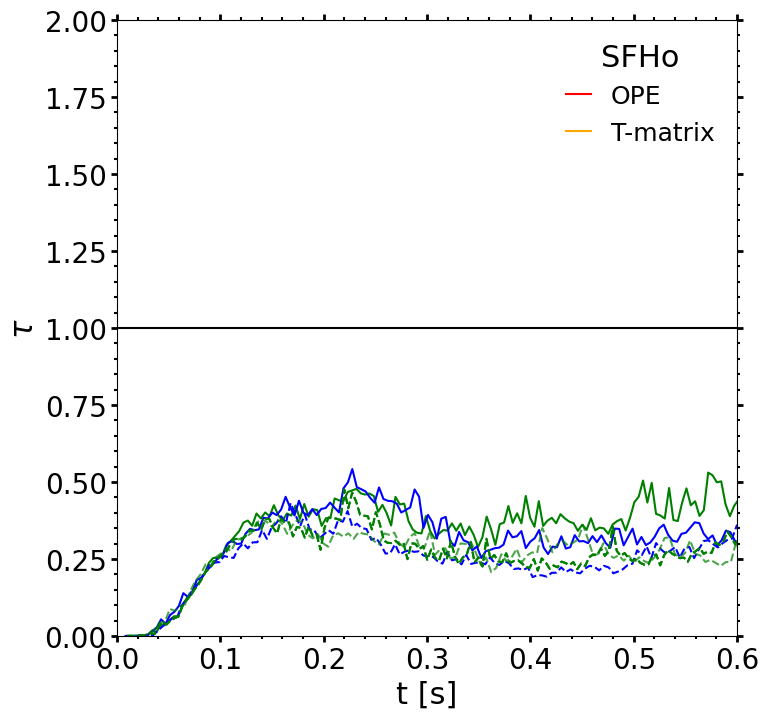

In [28]:
# tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

factor=1
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax1=ax

for i in list_file:
    tau=globals()[i[11]/globals()[i[12]/(abs(globals()[i[13])/globals()[i[14])
    x=globals()[i[0]
    time,tau_new=plot_interp(x,tau)
    ax1.plot(time-globals()['tb'+i,tau_new*factor,color=globals()['color'+i,ls=globals()['ticks'+i\
             ,alpha=globals()['alpha'+i)

black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=18,handlelength=1,title='SFHo',title_fontsize=22,frameon=False,loc= "upper right")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=20,handlelength=1,frameon=False,loc= "lower right")



ax1.set_xlim([0,0.6])
#ax1.set_ylim([10,40])
ax1.set_ylim([0,2])


plt.hlines(1.,xmin=0.,xmax=1.2,color='k')

for i in range(2) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)


ax1.set_xlabel(r't [s]',fontsize=22)
ax1.set_ylabel(r'$\tau$',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0.)
# ax1.set_xticklabels([])    


/tmp/ipykernel_286609/2652002522.py:12: RuntimeWarning: invalid value encountered in divide
  tau=s20_simp_SRO_Gang[11]/s20_simp_SRO_Gang[12]/(abs(s20_simp_SRO_Gang[13])/s20_simp_SRO_Gang[14])
/tmp/ipykernel_286609/2652002522.py:18: RuntimeWarning: invalid value encountered in divide
  tau=s20_ref_Gang_SRO[11]/s20_ref_Gang_SRO[12]/(abs(s20_ref_Gang_SRO[13])/s20_ref_Gang_SRO[14])
/tmp/ipykernel_286609/2652002522.py:25: RuntimeWarning: invalid value encountered in divide
  tau=s20_simp_SFHo_Gang[11]/s20_simp_SFHo_Gang[12]/abs(s20_simp_SFHo_Gang[13]/s20_simp_SFHo_Gang[14])
/tmp/ipykernel_286609/2652002522.py:28: RuntimeWarning: invalid value encountered in divide
  tau= s20_ref_SFHo_nb7[11]/s20_ref_SFHo_nb7[12]/abs(s20_ref_SFHo_nb7[13]/s20_ref_SFHo_nb7[14])
/tmp/ipykernel_286609/2652002522.py:33: RuntimeWarning: invalid value encountered in divide
  tau= s20_simp_SFHo3[11]/s20_simp_SFHo3[12]/abs(s20_simp_SFHo3[13]/s20_simp_SFHo3[14])
/tmp/ipykernel_286609/2652002522.py:37: RuntimeWarning:

NameError: name 's20_ref_Hann_SRO' is not defined

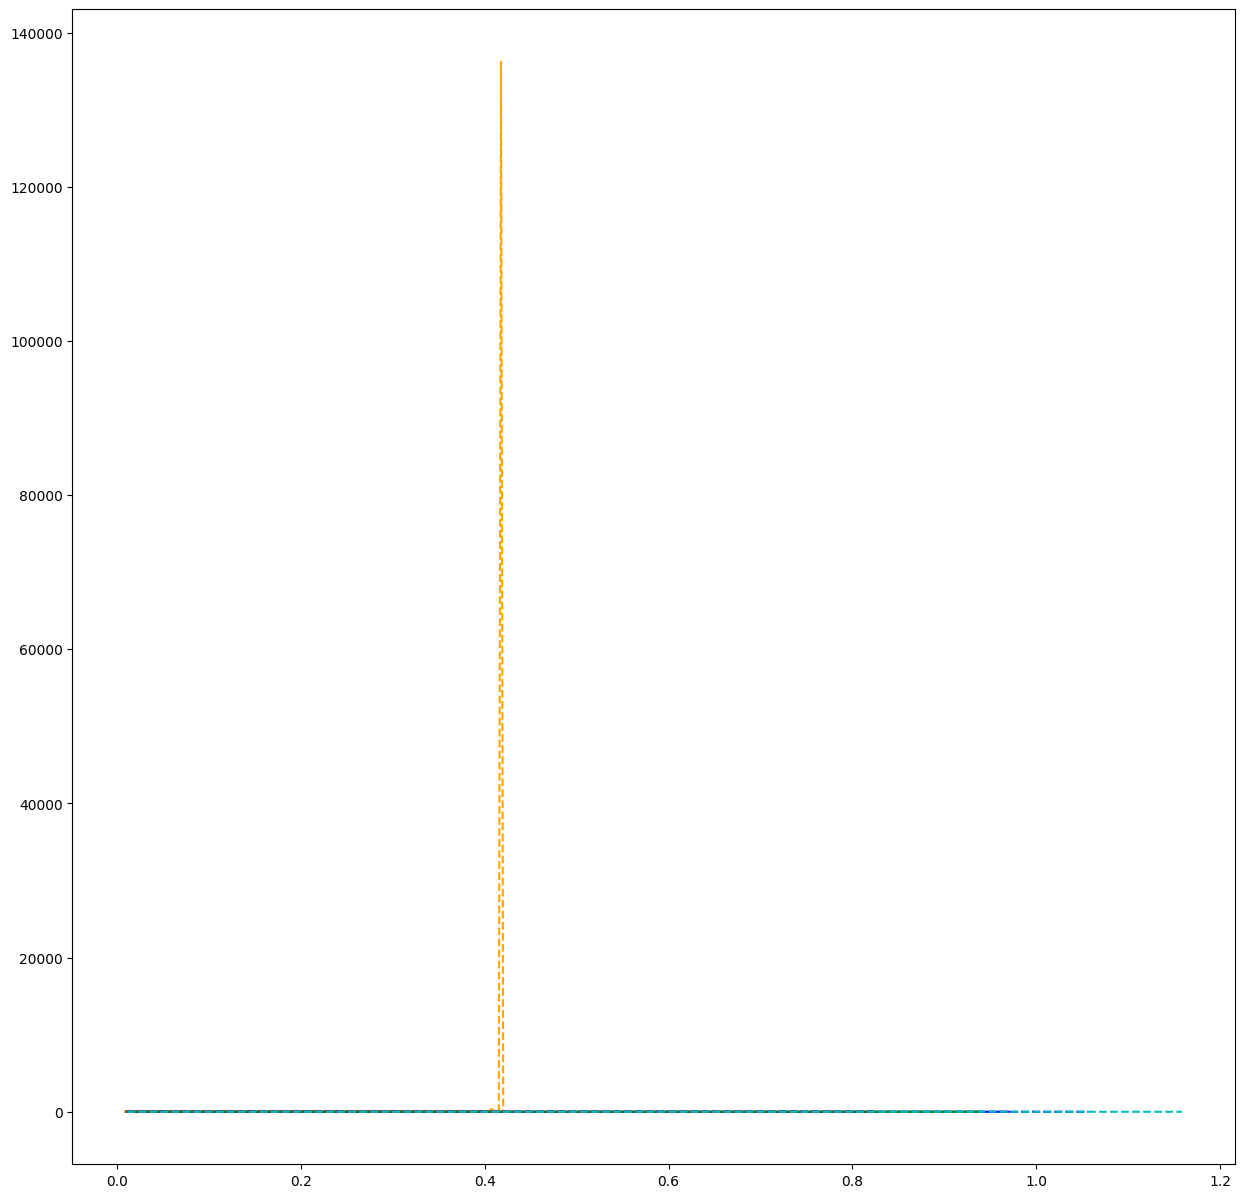

In [29]:
tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['r','orange','b','g']

x=1.
factor=1.
fig,ax1 = plt.subplots(1,1,figsize=(15,15))
#ax1=ax[0]
#ax2=ax[1]

tau=s20_simp_SRO_Gang[11]/s20_simp_SRO_Gang[12]/(abs(s20_simp_SRO_Gang[13])/s20_simp_SRO_Gang[14])
x=s20_simp_SRO_Gang[0]
time,tau_new=plot_interp(x,tau)
ax1.plot(time-tbounce_SRO,tau_new,'--',color=col[3])


tau=s20_ref_Gang_SRO[11]/s20_ref_Gang_SRO[12]/(abs(s20_ref_Gang_SRO[13])/s20_ref_Gang_SRO[14])
x=s20_ref_Gang_SRO[0]
time,tau_new=plot_interp(x,tau)



##################################################################################################################################
tau=s20_simp_SFHo_Gang[11]/s20_simp_SFHo_Gang[12]/abs(s20_simp_SFHo_Gang[13]/s20_simp_SFHo_Gang[14])


tau= s20_ref_SFHo_nb7[11]/s20_ref_SFHo_nb7[12]/abs(s20_ref_SFHo_nb7[13]/s20_ref_SFHo_nb7[14])
x=s20_ref_SFHo_nb7[0]
time,tau_new=plot_interp(x,tau)
ax1.plot(time-tbounce_SFHo,tau_new*factor,'-',color=col[0])

tau= s20_simp_SFHo3[11]/s20_simp_SFHo3[12]/abs(s20_simp_SFHo3[13]/s20_simp_SFHo3[14])
x=s20_simp_SFHo3[0]
ax1.plot(time-tbounce_SFHo,tau_new*factor,'--',color=col[0])

tau= s20_ref_Gang_SFHo[11]/s20_ref_Gang_SFHo[12]/abs(s20_ref_Gang_SFHo[13]/s20_ref_Gang_SFHo[14])
x=s20_ref_Gang_SFHo[0]
time,tau_new=plot_interp(x,tau)
ax1.plot(time-tbounce_SFHo,tau_new*factor,'-',color=col[1])

tau=  s20_simp_SFHo_Gang[11]/s20_simp_SFHo_Gang[12]/abs(s20_simp_SFHo_Gang[13]/s20_simp_SFHo_Gang[14])
x=s20_simp_SFHo_Gang[0]
time,tau_new=plot_interp(x,tau)
ax1.plot(time-tbounce_SFHo,tau_new*factor,'--',color=col[1])






########################################################################################


tau=s20_ref_SRO3[11]/s20_ref_SRO3[12]/abs(s20_ref_SRO3[13]/s20_ref_SRO3[14])
x=s20_ref_SRO3[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_ref_SRO3[0].min(),s20_ref_SRO3[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'-',color=col[2])


tau=s20_simp_SRO3[11]/s20_simp_SRO3[12]/abs(s20_simp_SRO3[13]/s20_simp_SRO3[14])
x=s20_simp_SRO3[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_simp_SRO3[0].min(),s20_simp_SRO3[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'--',color=col[2])

tau=s20_ref_Gang_SRO[11]/s20_ref_Gang_SRO[12]/abs(s20_ref_Gang_SRO[13]/s20_ref_Gang_SRO[14])
x=s20_ref_Gang_SRO[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_ref_Gang_SRO[0].min(),s20_ref_Gang_SRO[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'-',color=col[3])













tau=s20_simp_SRO_Gang[11]/s20_simp_SRO_Gang[12]/abs(s20_simp_SRO_Gang[13]/s20_simp_SRO_Gang[14])
x=s20_simp_SRO_Gang[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_simp_SRO_Gang[0].min(),s20_simp_SRO_Gang[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'--',color=col[3])




tau=s20_simp_SRO_Gang[11]/s20_simp_SRO_Gang[12]/abs(s20_simp_SRO_Gang[13]/s20_simp_SRO_Gang[14])
x=s20_simp_SRO_Gang[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_simp_SRO_Gang[0].min(),s20_simp_SRO_Gang[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'--',color="m")


tau=s20_simp_SRO_Gang8[11]/s20_simp_SRO_Gang8[12]/abs(s20_simp_SRO_Gang8[13]/s20_simp_SRO_Gang8[14])
x=s20_simp_SRO_Gang8[0]
f = interpolate.interp1d(x, tau)
time=np.linspace(s20_simp_SRO_Gang8[0].min(),s20_simp_SRO_Gang8[0].max(),500)
tau_new= f(time)
ax1.plot(time-tbounce_SRO,tau_new*factor,'--',color="c")


tau=s20_ref_Hann_SRO[11]/s20_ref_Hann_SRO[12]/abs(s20_ref_Hann_SRO[13]/s20_ref_Hann_SRO[14])
x=s20_ref_Hann_SRO[0]
#f = interpolate.interp1d(x, tau)
#time=np.linspace(s20_simp_SRO_Gang8[0].min(),s20_simp_SRO_Gang8[0].max(),50)
#tau_new= f(time)
ax1.plot(x-tbounce_SRO,tau*factor,'--',color="y")


# ax1.set_yscale('log')


ax1.axhline(y=1.)
ax1.set_ylim([0,2])
ax1.set_xlim([0,1.2])

In [ ]:
!ls

In [ ]:
!head s20_ref_SRO3.dat
